# Early stage Diabetes Risk Prediction

In [65]:
#import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [66]:
#Read the data
diab=pd.read_csv("diabetes_data_upload.csv")
Sugar=diab
diab

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [67]:
#complete information about the data
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [68]:
#columns present in th data
diab.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [69]:
#shape of the data
diab.shape

(520, 17)

In [70]:
#smaple records of the data 
diab.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
405,58,Male,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Yes,No,No,Negative
317,36,Female,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Negative
390,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
287,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
19,43,Male,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
29,53,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Positive
306,28,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
10,44,Male,Yes,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Positive


In [71]:
#check whether any missing values in the data
diab.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [72]:
#statistics of the data
diab.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis


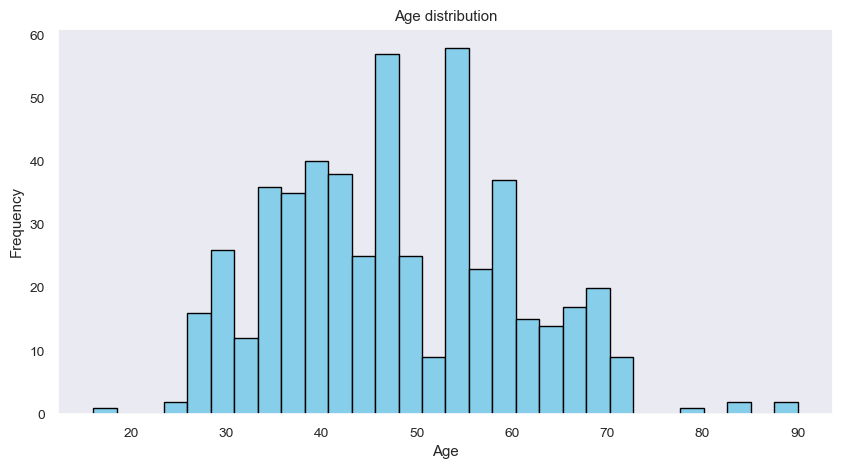

In [73]:
#Distribution of age
#Performing univariant analysis 
plt.figure(figsize=(10,5))
plt.hist(diab['Age'],bins=30,color='skyblue',edgecolor='black')
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()

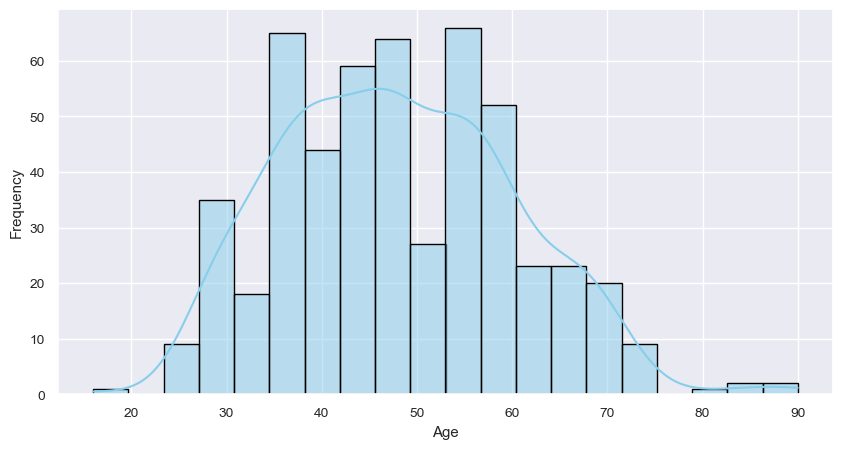

In [74]:

plt.figure(figsize=(10,5))
sns.histplot(diab['Age'],bins=20,kde=True,color="skyblue",edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

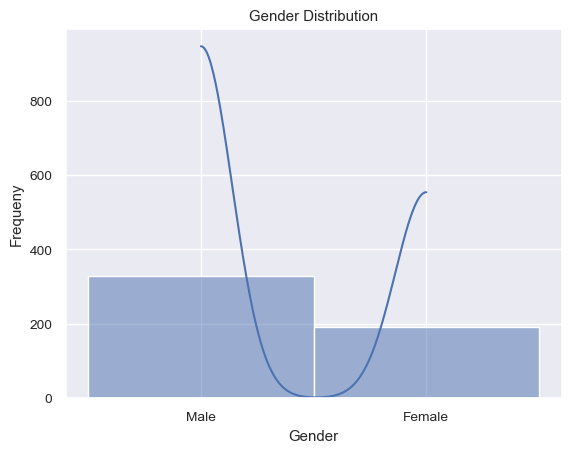

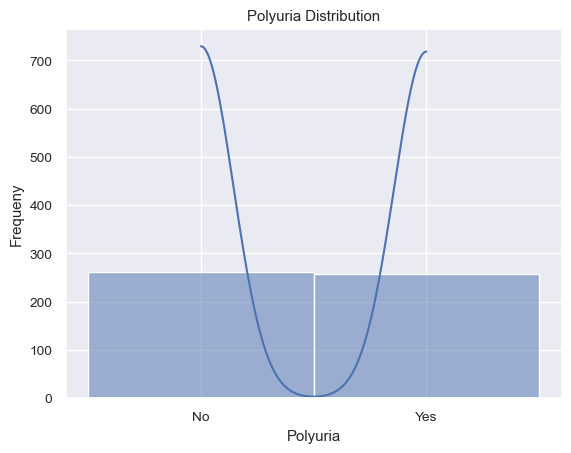

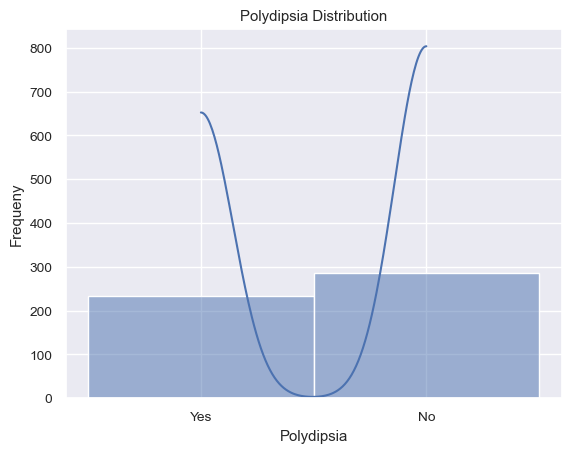

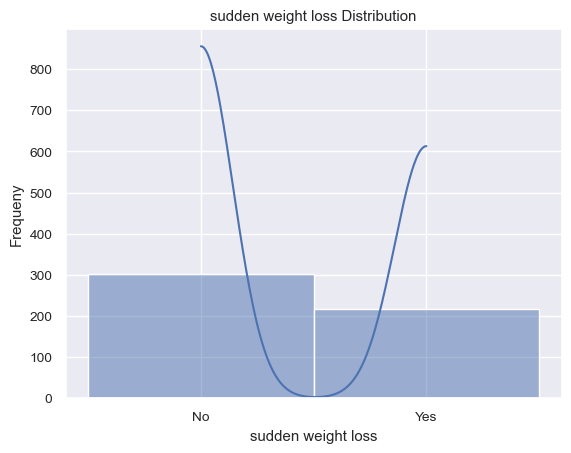

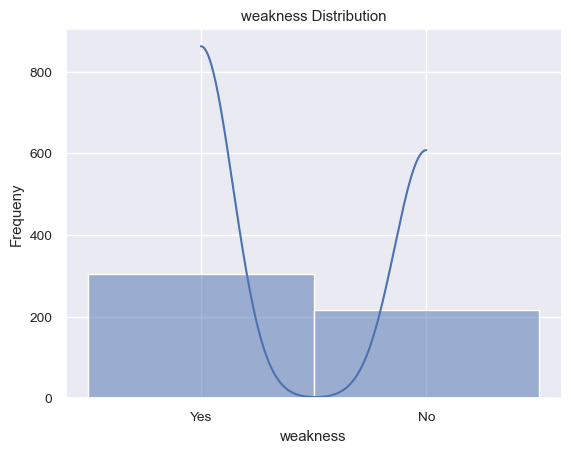

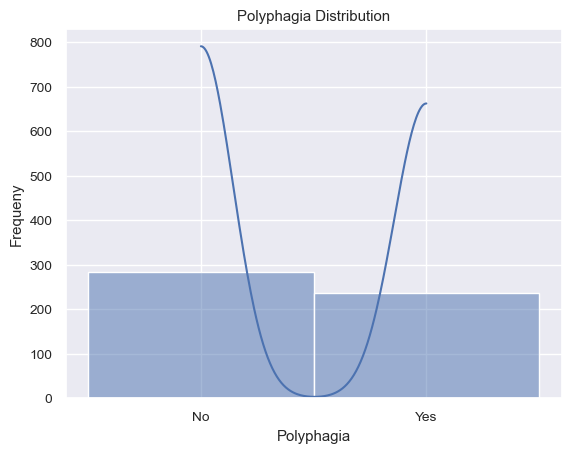

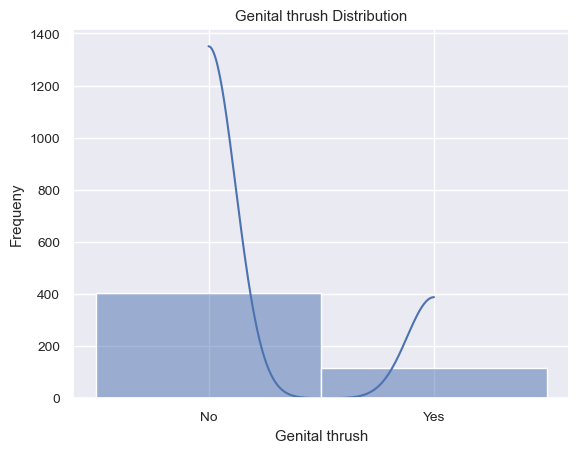

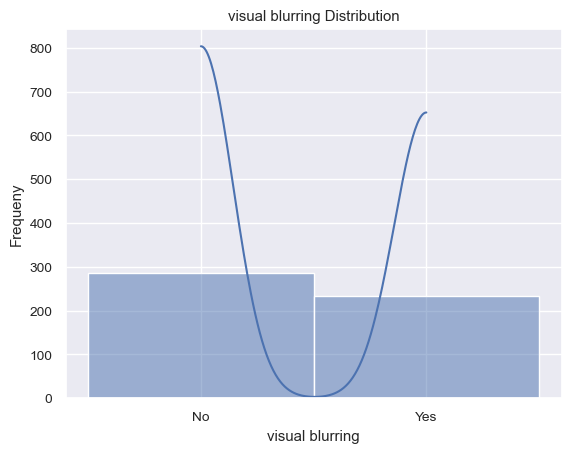

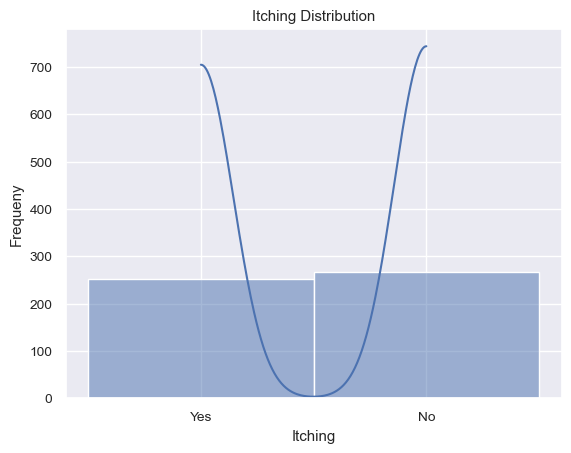

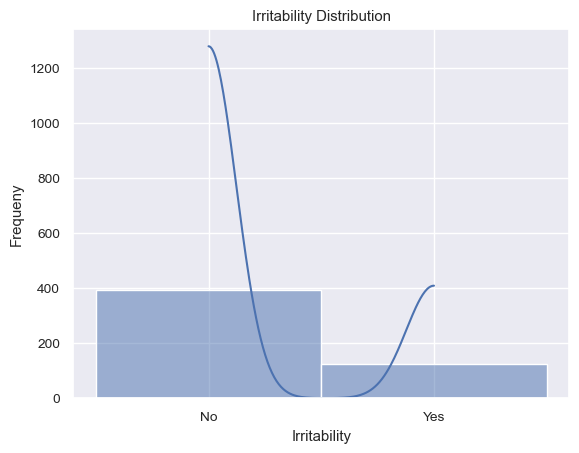

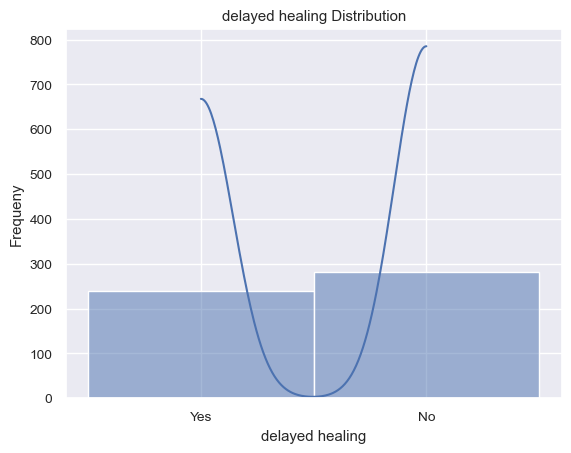

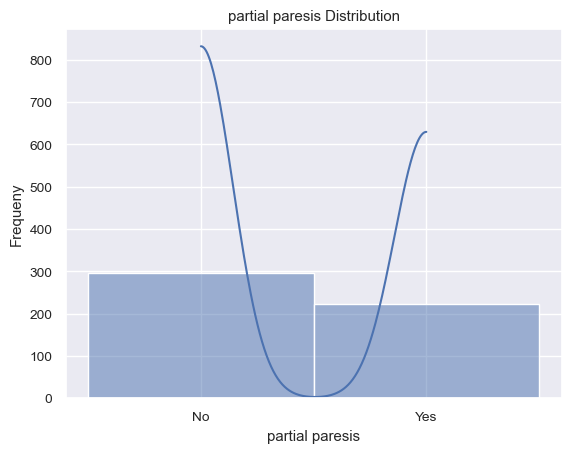

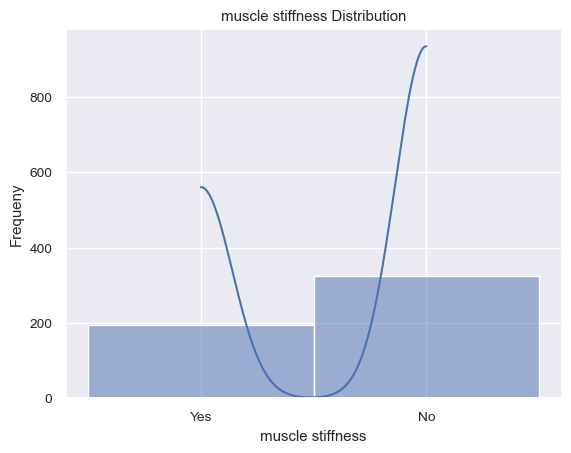

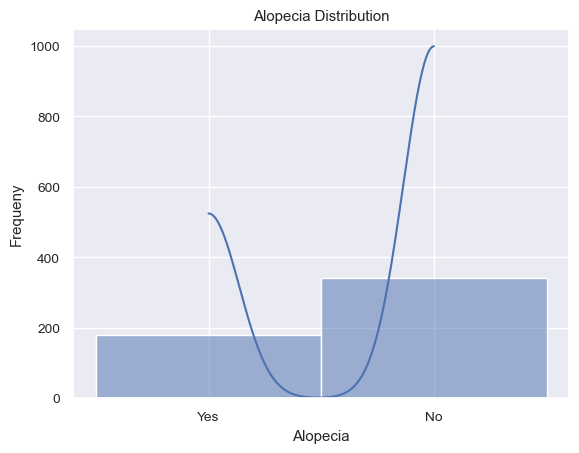

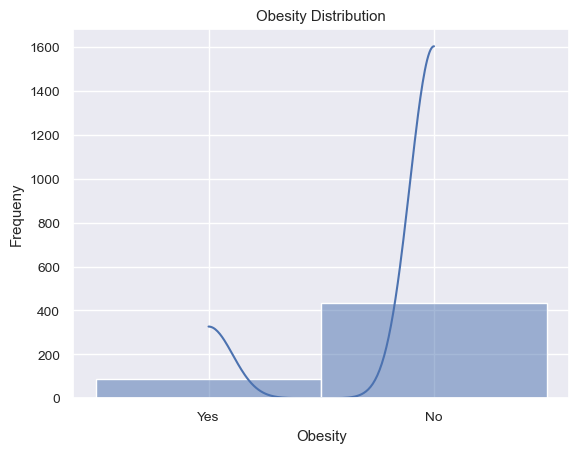

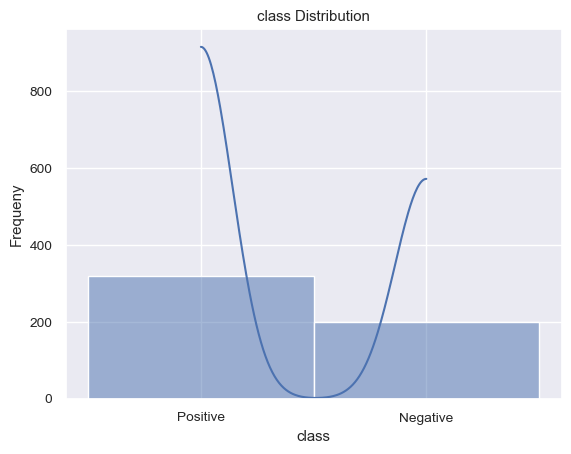

In [75]:
#plot the distribution of all the columns
columns_to_plot = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity','class']
for col in  columns_to_plot:
    sns.histplot(diab[col],kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("Frequeny")
    plt.show()



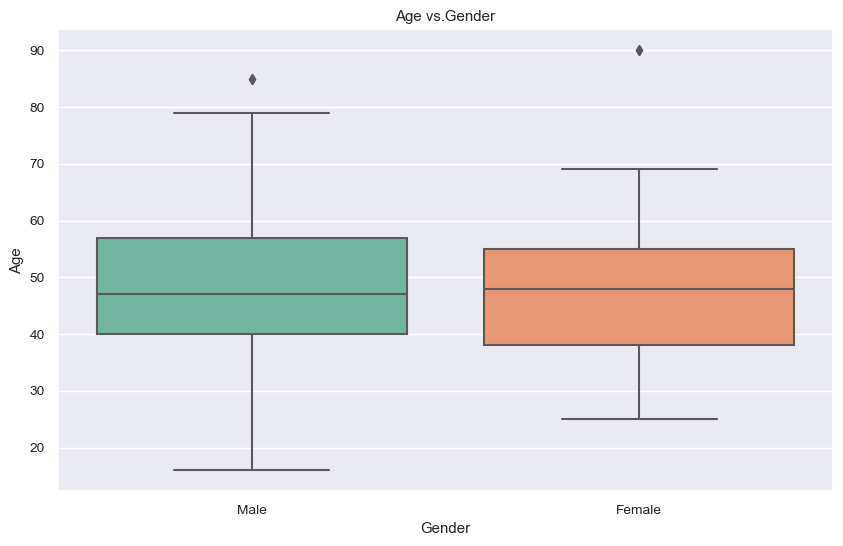

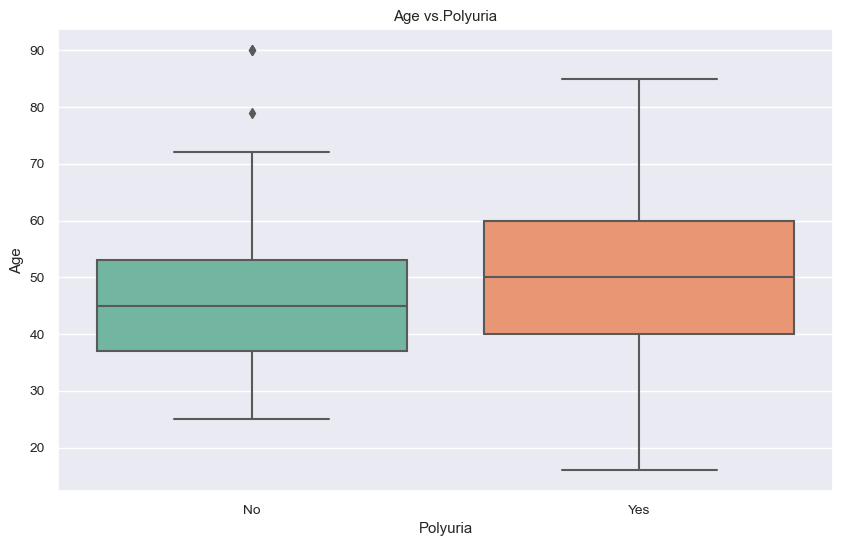

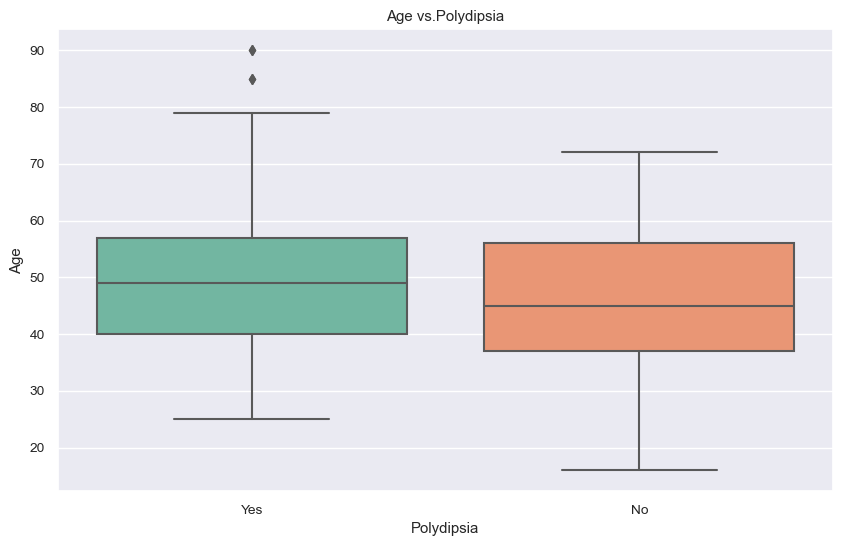

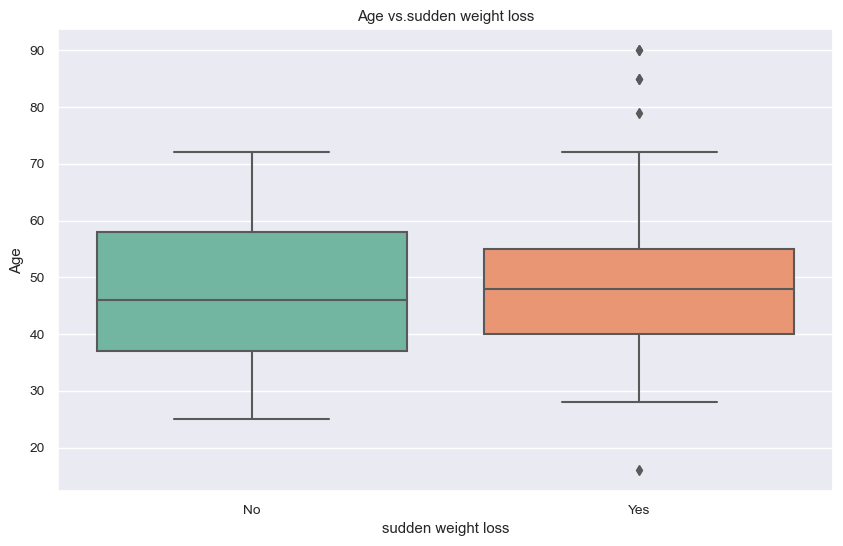

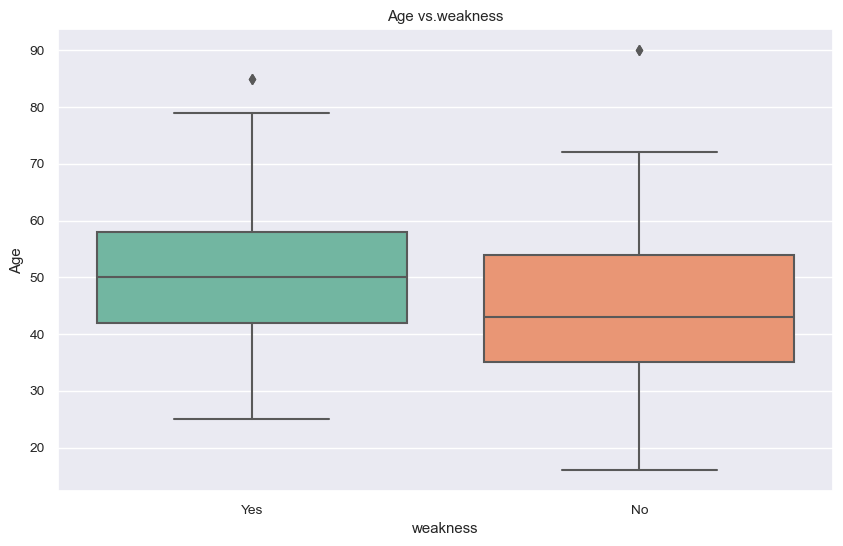

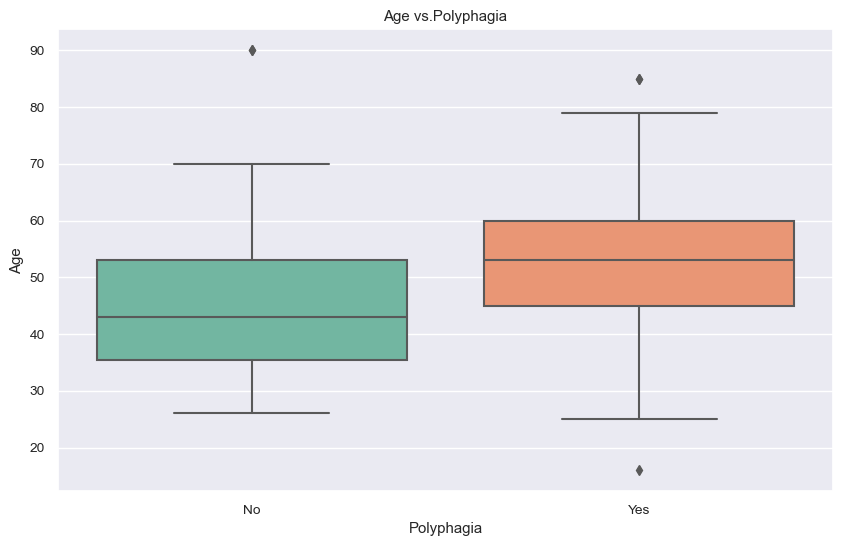

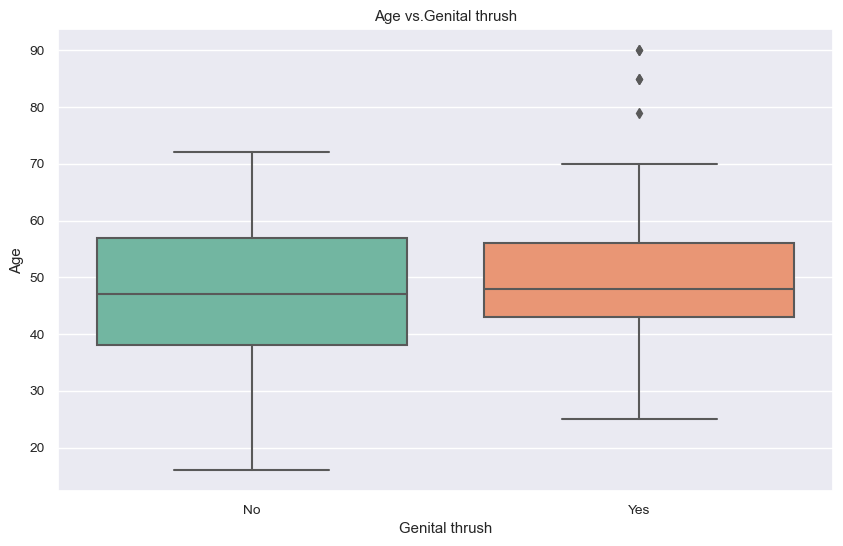

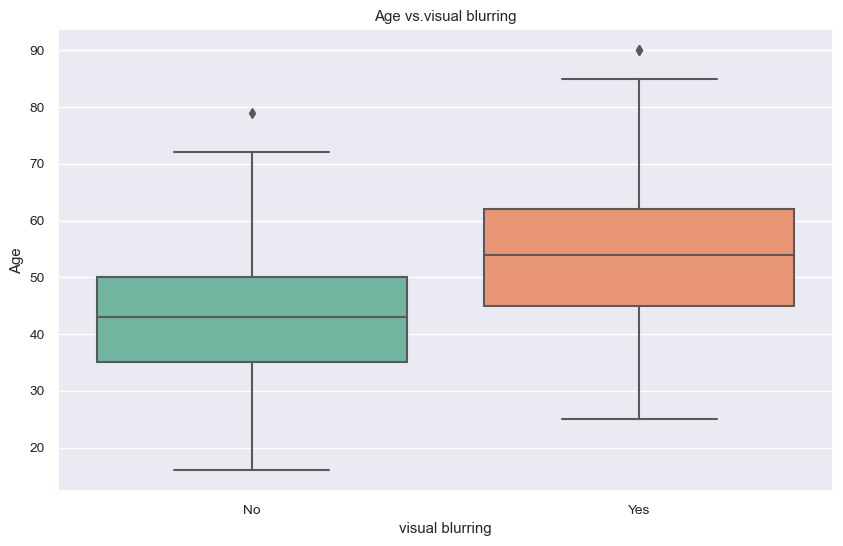

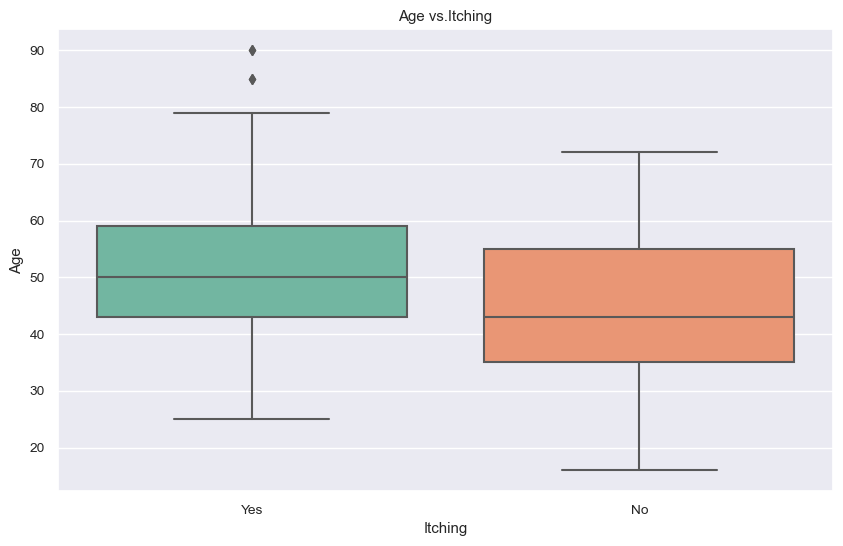

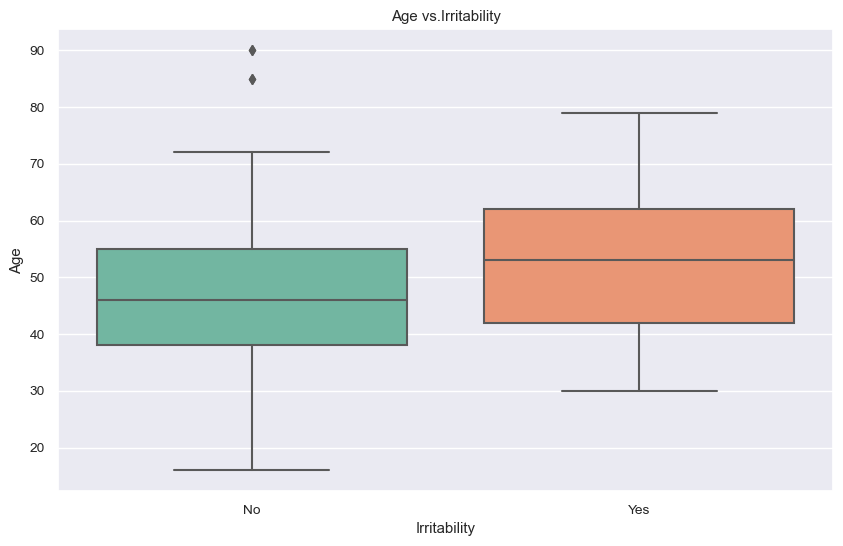

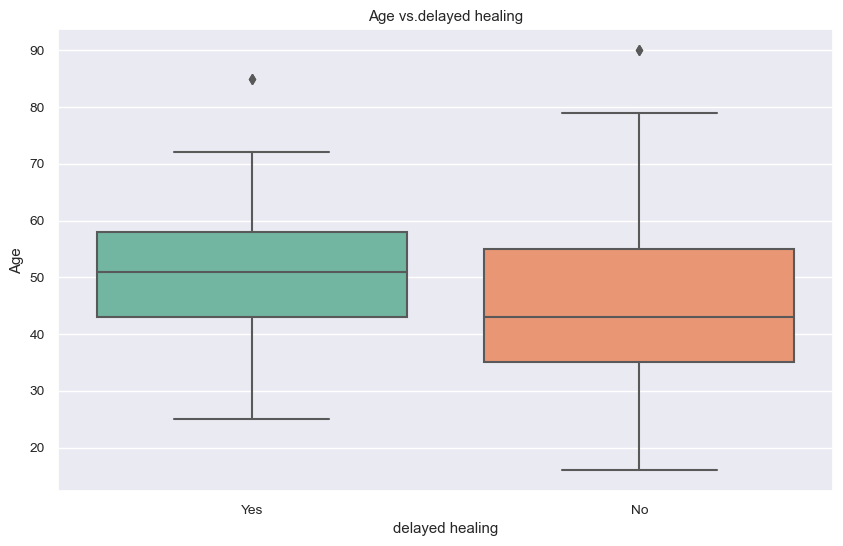

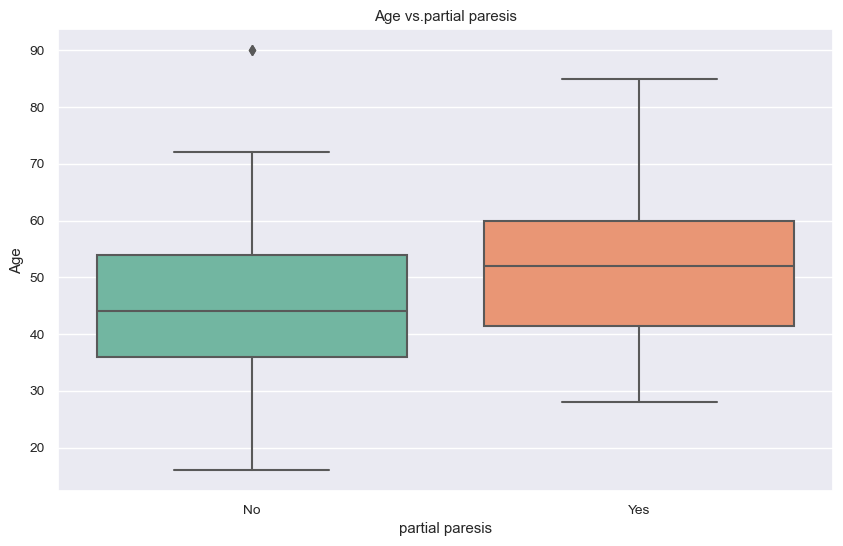

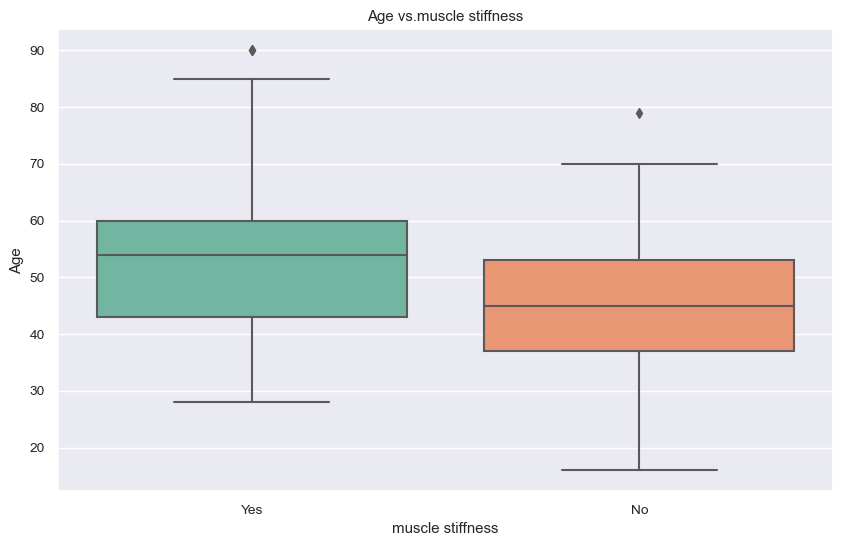

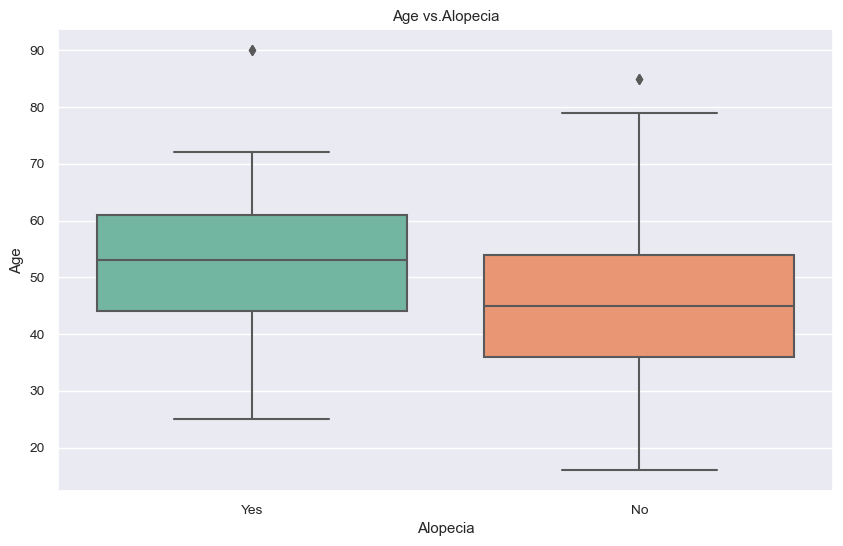

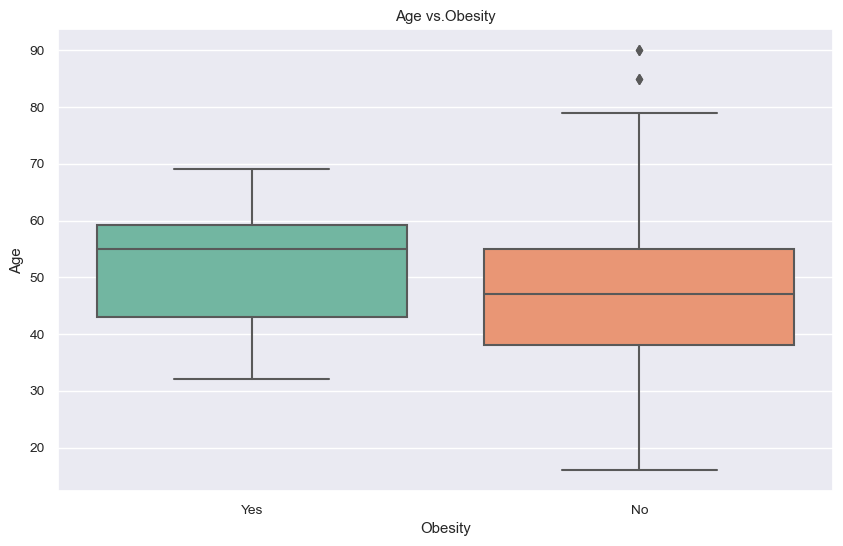

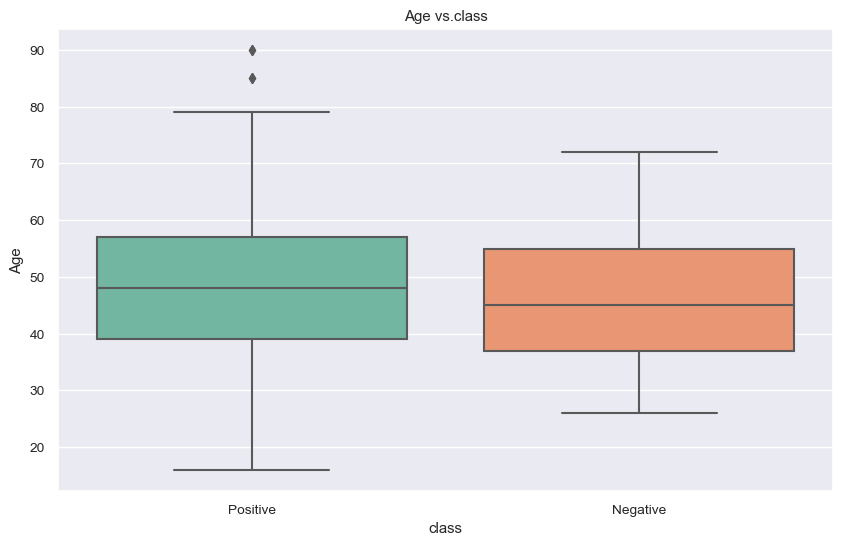

In [76]:
#performing bivariant analysis

for cat_var in columns_to_plot:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=cat_var,y='Age',data=diab,palette='Set2')
    plt.title(f'Age vs.{cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Age')
    plt.show()


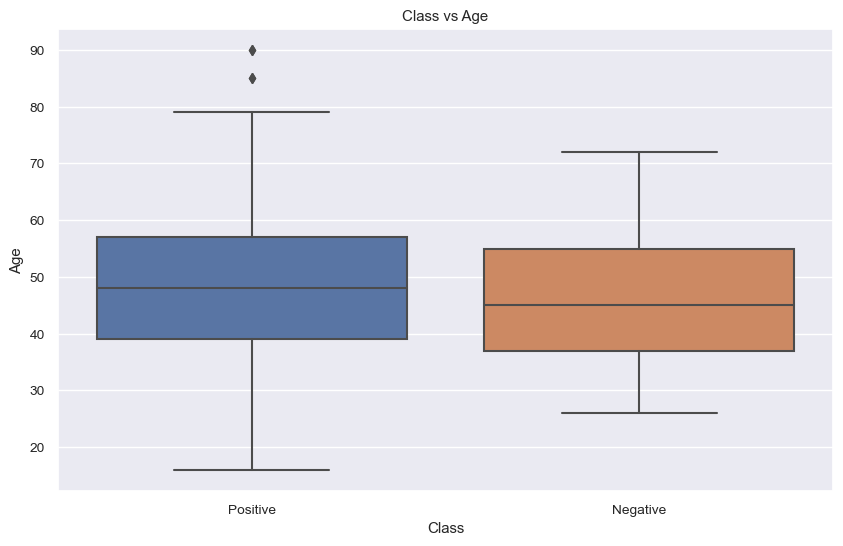

In [77]:
#identify outliers in age column
plt.figure(figsize=(10,6))
sns.boxplot(x='class',y='Age',data=diab)
plt.title("Class vs Age")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

In [78]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = diab['Age'].quantile(0.25)
Q3 = diab['Age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = diab[(diab['Age'] < lower_bound) | (diab['Age'] > upper_bound)]

print("Outliers:")
print(outliers)

# Filter the DataFrame to remove outliers
diab_outliers = diab[(diab['Age'] >= lower_bound) & (diab['Age'] <= upper_bound)]

print("Data after removing outliers:")
print(diab_outliers)


Outliers:
     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
101   85    Male      Yes        Yes                Yes      Yes        Yes   
102   90  Female       No        Yes                Yes       No         No   
185   85    Male      Yes        Yes                Yes      Yes        Yes   
186   90  Female       No        Yes                Yes       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
101            Yes             Yes     Yes           No             Yes   
102            Yes             Yes     Yes           No              No   
185            Yes             Yes     Yes           No             Yes   
186            Yes             Yes     Yes           No              No   

    partial paresis muscle stiffness Alopecia Obesity     class  
101             Yes              Yes       No      No  Positive  
102              No              Yes      Yes      No  Positive  
185             Yes 

In [79]:
# Filter the DataFrame to remove outliers
diab_outliers= diab[(diab['Age'] >= lower_bound) & (diab['Age'] <= upper_bound)]

print("Data after removing outliers:")
print(diab_outliers)


Data after removing outliers:
     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush vi

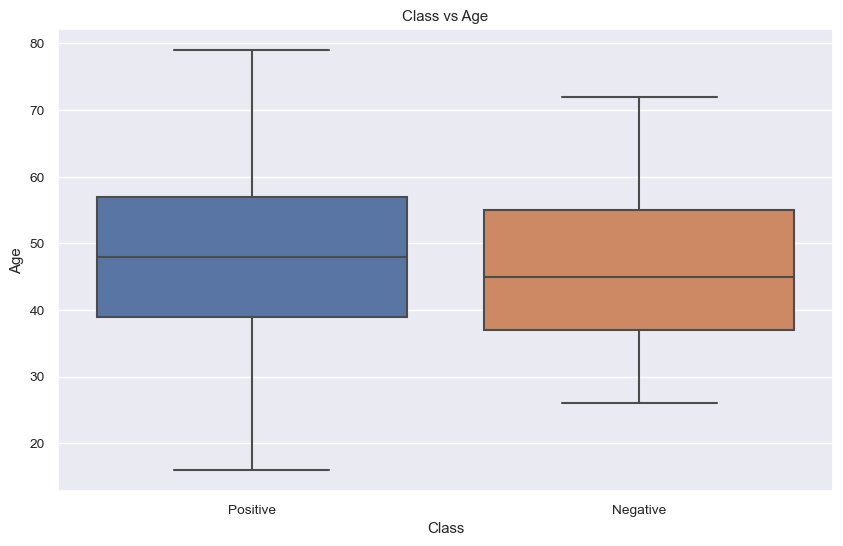

In [80]:
#identify outliers in age column
plt.figure(figsize=(10,6))
sns.boxplot(x='class',y='Age',data=diab_outliers)
plt.title("Class vs Age")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

In [81]:
# Find duplicate rows based on 'Age' and 'Gender' columns
# duplicates_columns = diab[diab.duplicated(subset=['Age', 'Gender','Polyuria', 'Polydipsia', 'sudden weight loss',
#        'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
#        'Itching', 'Irritability', 'delayed healing', 'partial paresis',
#        'muscle stiffness', 'Alopecia', 'Obesity', 'class'], keep=False)]

# print("Duplicate rows:")
# print(duplicates_columns)


In [82]:
# # Remove duplicate rows based on the specified columns
# diab_cleaned = diab.drop_duplicates(subset=[
#     'Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
#     'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
#     'Itching', 'Irritability', 'delayed healing', 'partial paresis',
#     'muscle stiffness', 'Alopecia', 'Obesity', 'class'
# ])

# print("Data after removing duplicates:")
# print(diab_cleaned)


In [83]:
# # Verify no duplicates remain
# duplicates_check = diab_cleaned[diab_cleaned.duplicated(subset=[
#     'Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
#     'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
#     'Itching', 'Irritability', 'delayed healing', 'partial paresis',
#     'muscle stiffness', 'Alopecia', 'Obesity', 'class'
# ], keep=False)]

# print("Remaining duplicate rows after cleanup:")
# print(duplicates_check)


In [84]:
# diab_cleaned.shape

In [85]:
# diab_cleaned.isnull().sum()

In [86]:
# diab_cleaned.sample(10)

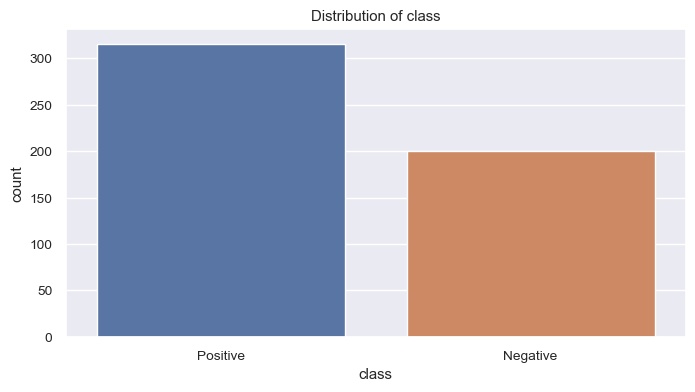

In [87]:
# visualize the distribution of classes
plt.figure(figsize=(8,4))
sns.countplot(x='class',data=diab_outliers)
plt.title('Distribution of class')
plt.show()

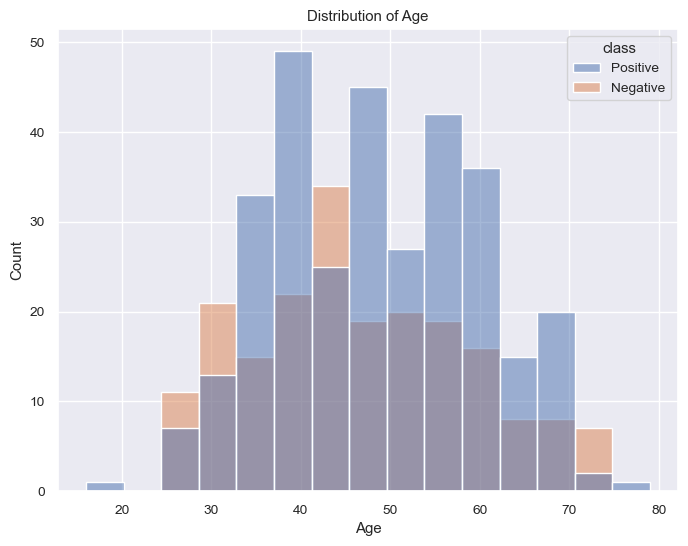

In [88]:
#visualize the distribution of age
plt.figure(figsize=(8,6))
sns.histplot(x='Age',data=diab_outliers,hue='class')
plt.title("Distribution of Age")
plt.show()

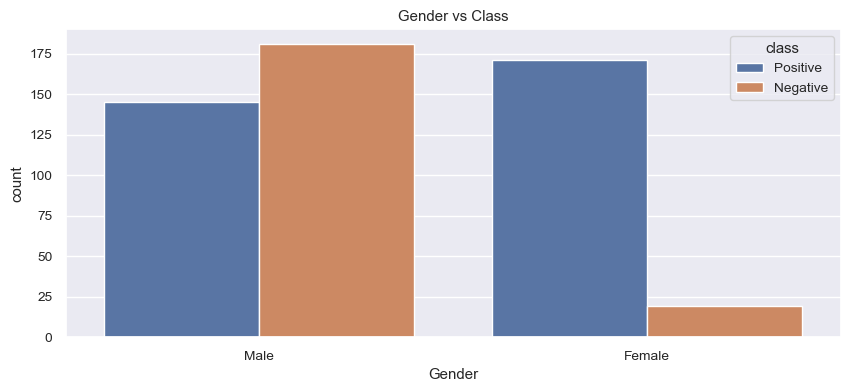

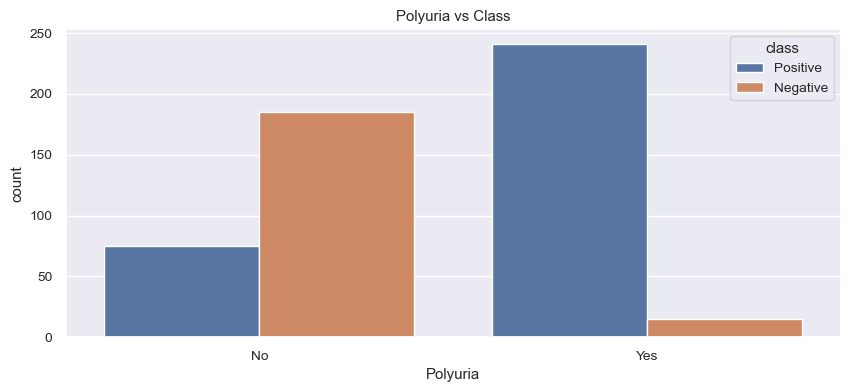

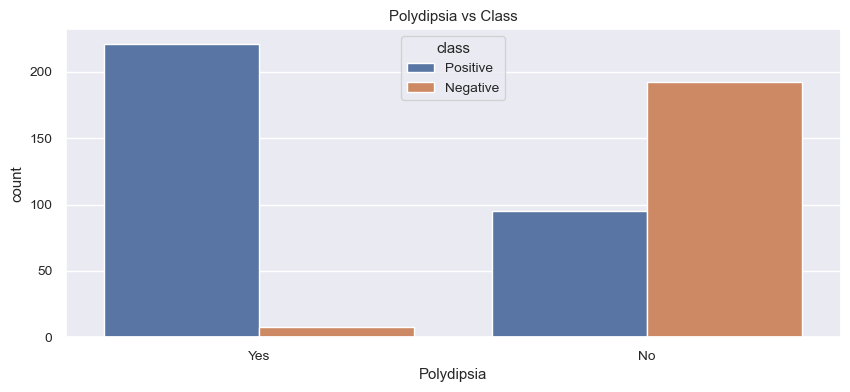

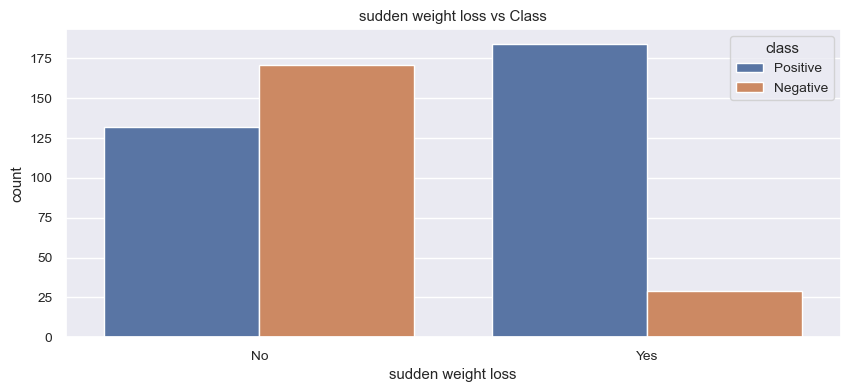

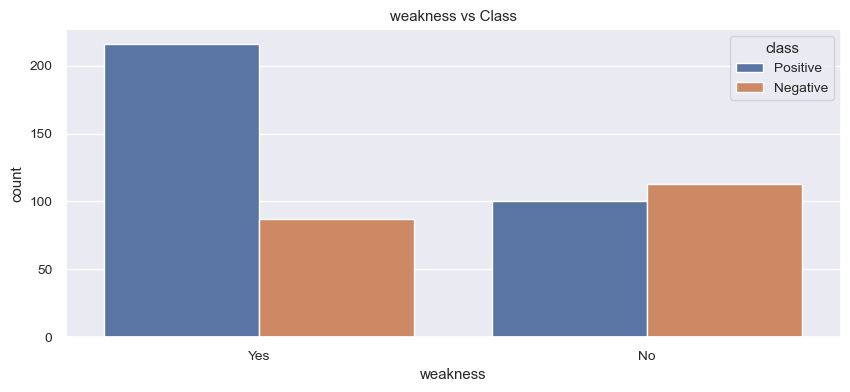

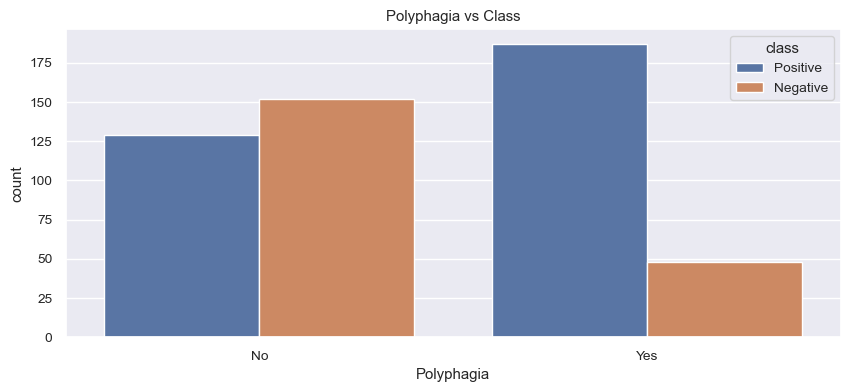

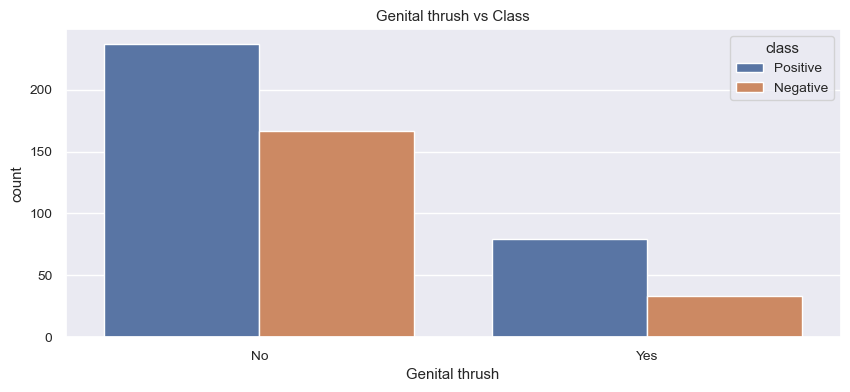

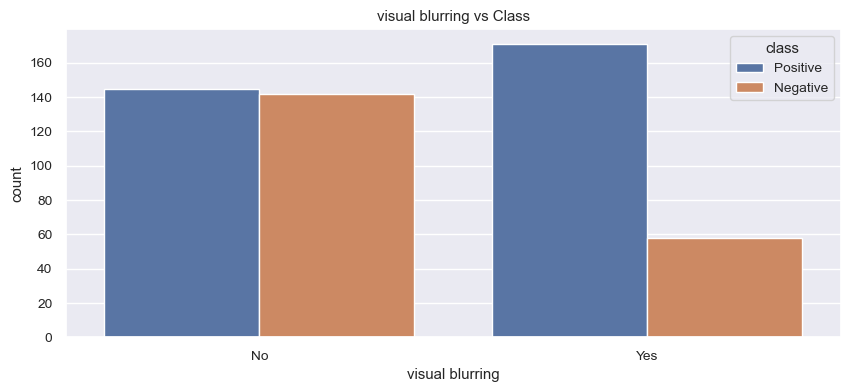

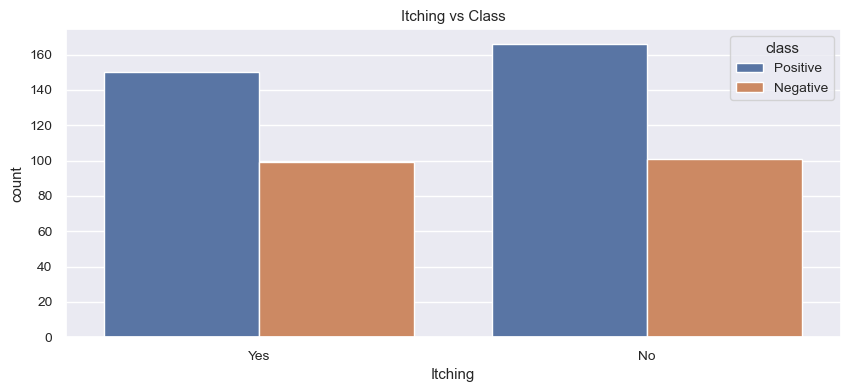

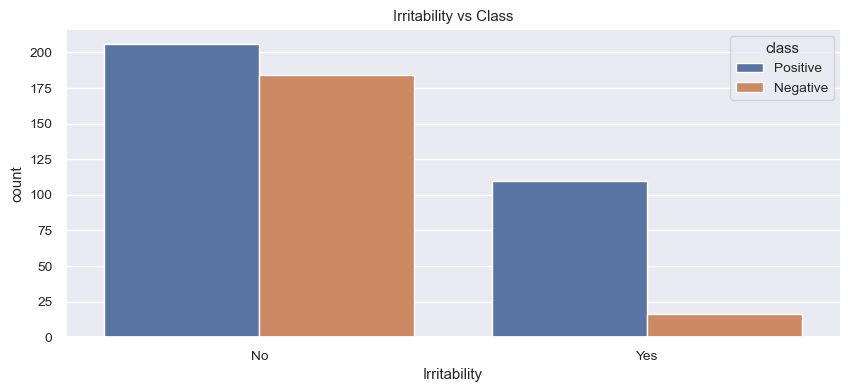

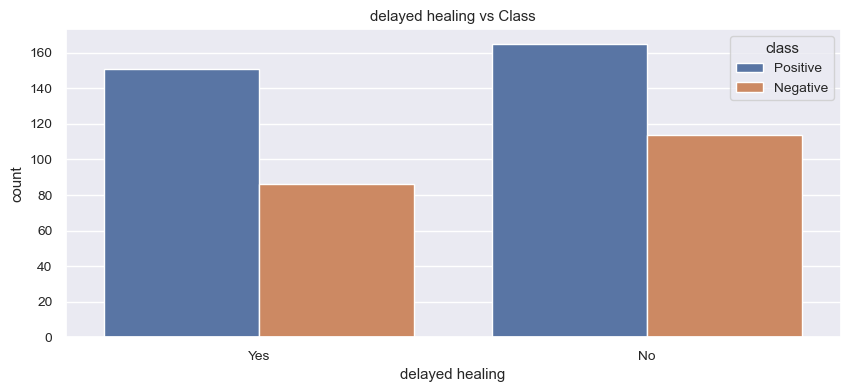

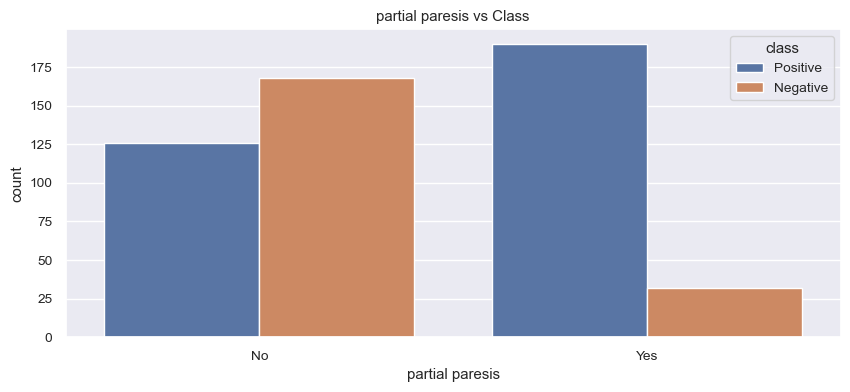

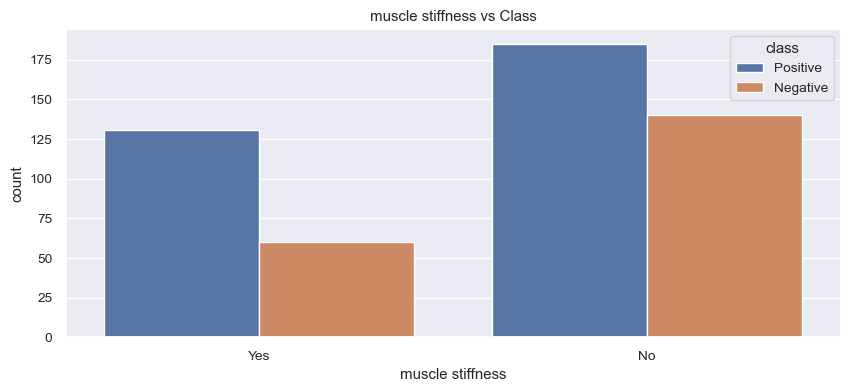

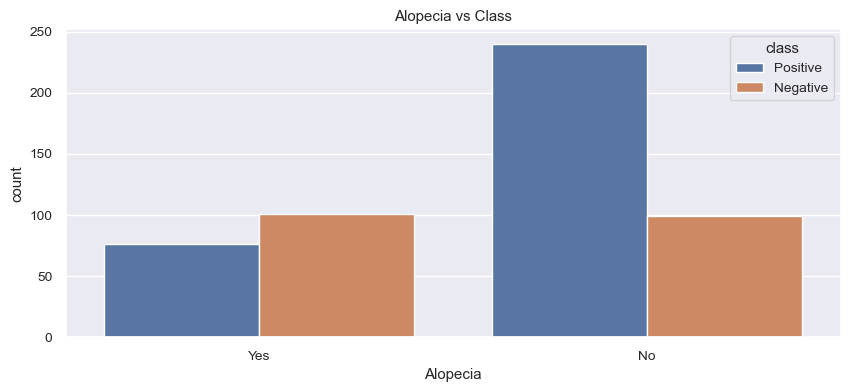

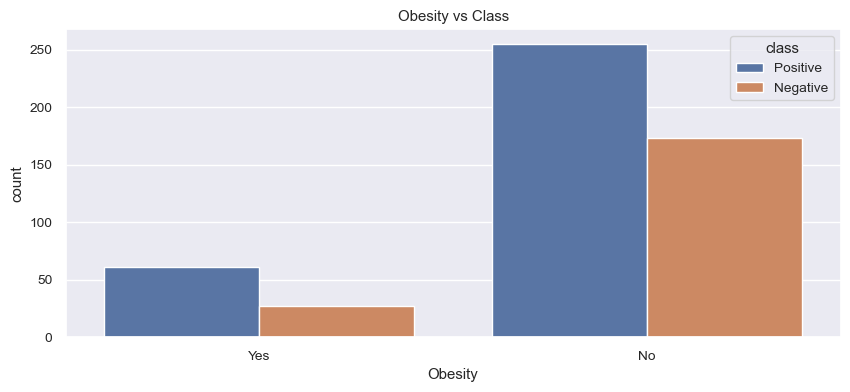

In [89]:
for column in columns_to_plot:
    if column != 'class' and column!='Age':  # Skiping the target column and Age
        plt.figure(figsize=(10,4))
        sns.countplot(x=column, data=diab_outliers, hue='class')
        plt.title(f'{column} vs Class')
        plt.show()

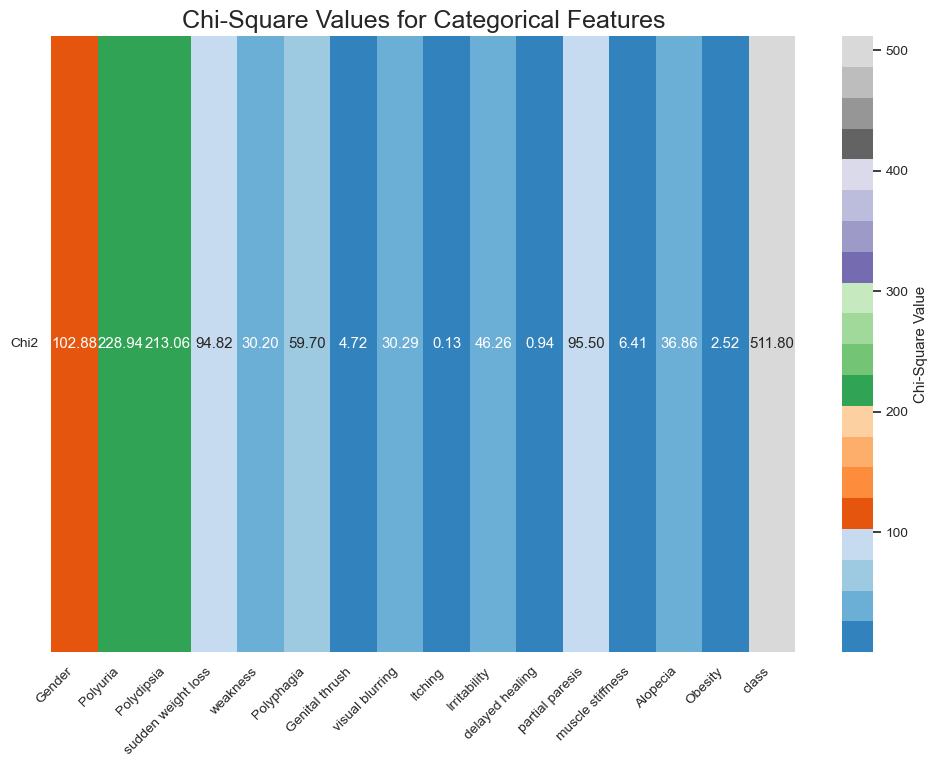

In [90]:
#Multivariant analysis 
from scipy.stats import chi2_contingency
#creating corelation heatmap for categorical variables
categorical_features=['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']
contingency_tables=[pd.crosstab(diab_outliers[var],diab_outliers['class']) for var in categorical_features]

#calculate chisquare test for each feature
chi2_values = [chi2_contingency(table)[0] for table in contingency_tables]

#Create a heatmap
heatmap_data = pd.DataFrame({'Feature': categorical_features, 'Chi2': chi2_values})
heatmap_data.set_index('Feature', inplace=True)

# Plot the heatmap 
plt.figure(figsize=(12, 8))  # Increase figure size
sns.set(font_scale=0.9)  # Increase font size
ax = sns.heatmap(heatmap_data.T, annot=True, cmap='tab20c', fmt=".2f", cbar_kws={'label': 'Chi-Square Value'})
ax.set_title('Chi-Square Values for Categorical Features', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [91]:
#chisquare test of independence

# Create a contingency table for Gender and class
contingency_tables = pd.crosstab(diab_outliers['Gender'], diab_outliers['class'])
print("Contingency Table:\n", contingency_tables)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_tables)

# Print results
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant relationship between Gender and Diabetes presence.")
else:
    print("There is no significant relationship between Gender and Diabetes presence.")

Contingency Table:
 class   Negative  Positive
Gender                    
Female        19       171
Male         181       145
Chi-Square statistic: 102.88499678741776
P-value: 3.5517930351395176e-24
Degrees of freedom: 1
Expected frequencies:
 [[ 73.64341085 116.35658915]
 [126.35658915 199.64341085]]
There is a significant relationship between Gender and Diabetes presence.


In [92]:
# Create a contingency table for  and class
contingency_tables = pd.crosstab(diab_outliers['Polyuria'], diab_outliers['class'])
print("Contingency Table:\n", contingency_tables)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_tables)

# Print results
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant relationship between Polyuria and Diabetes presence.")
else:
    print("There is no significant relationship between Polyuria and Diabetes presence.")

Contingency Table:
 class     Negative  Positive
Polyuria                    
No             185        75
Yes             15       241
Chi-Square statistic: 228.94281329494282
P-value: 1.0136771021381013e-51
Degrees of freedom: 1
Expected frequencies:
 [[100.7751938 159.2248062]
 [ 99.2248062 156.7751938]]
There is a significant relationship between Polyuria and Diabetes presence.


In [93]:
#Create a contingency table for  and class
contingency_tables = pd.crosstab(diab_outliers['Polydipsia'], diab_outliers['class'])
print("Contingency Table:\n", contingency_tables)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_tables)

# Print results
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant relationship between Polydipsia and Diabetes presence.")
else:
    print("There is no significant relationship between Polydipsia and Diabetes presence.")

Contingency Table:
 class       Negative  Positive
Polydipsia                    
No               192        95
Yes                8       221
Chi-Square statistic: 213.06376771170602
P-value: 2.947548805006786e-48
Degrees of freedom: 1
Expected frequencies:
 [[111.24031008 175.75968992]
 [ 88.75968992 140.24031008]]
There is a significant relationship between Polydipsia and Diabetes presence.


In [94]:
#Create a contingency table for  and class
contingency_tables = pd.crosstab(diab_outliers['sudden weight loss'], diab_outliers['class'])
print("Contingency Table:\n", contingency_tables)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_tables)

# Print results
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant relationship between sudden weight loss and Diabetes presence.")
else:
    print("There is no significant relationship between sudden weight loss and Diabetes presence.")

Contingency Table:
 class               Negative  Positive
sudden weight loss                    
No                       171       132
Yes                       29       184
Chi-Square statistic: 94.82303020781663
P-value: 2.081893975779792e-22
Degrees of freedom: 1
Expected frequencies:
 [[117.44186047 185.55813953]
 [ 82.55813953 130.44186047]]
There is a significant relationship between sudden weight loss and Diabetes presence.


In [95]:
#Create a contingency table for  and class
contingency_tables = pd.crosstab(diab_outliers['weakness'], diab_outliers['class'])
print("Contingency Table:\n", contingency_tables)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_tables)

# Print results
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant relationship between weakness and Diabetes presence.")
else:
    print("There is no significant relationship between weakness and Diabetes presence.")

Contingency Table:
 class     Negative  Positive
weakness                    
No             113       100
Yes             87       216
Chi-Square statistic: 30.19724752828288
P-value: 3.902629341706442e-08
Degrees of freedom: 1
Expected frequencies:
 [[ 82.55813953 130.44186047]
 [117.44186047 185.55813953]]
There is a significant relationship between weakness and Diabetes presence.


In [96]:
#Create a contingency table for  and class
contingency_tables = pd.crosstab(diab_outliers['Polyphagia'], diab_outliers['class'])
print("Contingency Table:\n", contingency_tables)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_tables)

# Print results
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant relationship between Polyphagia and Diabetes presence.")
else:
    print("There is no significant relationship between Polyphagia and Diabetes presence.")

Contingency Table:
 class       Negative  Positive
Polyphagia                    
No               152       129
Yes               48       187
Chi-Square statistic: 59.700323096785084
P-value: 1.1045840793688633e-14
Degrees of freedom: 1
Expected frequencies:
 [[108.91472868 172.08527132]
 [ 91.08527132 143.91472868]]
There is a significant relationship between Polyphagia and Diabetes presence.


In [97]:
#Create a contingency table for  and class
contingency_tables = pd.crosstab(diab_outliers['Genital thrush'], diab_outliers['class'])
print("Contingency Table:\n", contingency_tables)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_tables)

# Print results
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant relationship between Genital thrush and Diabetes presence.")
else:
    print("There is no significant relationship between Genital thrush and Diabetes presence.")

Contingency Table:
 class           Negative  Positive
Genital thrush                    
No                   167       237
Yes                   33        79
Chi-Square statistic: 4.71905113087032
P-value: 0.029830199556829976
Degrees of freedom: 1
Expected frequencies:
 [[156.58914729 247.41085271]
 [ 43.41085271  68.58914729]]
There is a significant relationship between Genital thrush and Diabetes presence.


In [98]:
#Create a contingency table for  and class
contingency_tables = pd.crosstab(diab_outliers['visual blurring'], diab_outliers['class'])
print("Contingency Table:\n", contingency_tables)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_tables)

# Print results
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant relationship between visual blurring and Diabetes presence.")
else:
    print("There is no significant relationship between visual blurring and Diabetes presence.")

Contingency Table:
 class            Negative  Positive
visual blurring                    
No                    142       145
Yes                    58       171
Chi-Square statistic: 30.286116899908066
P-value: 3.727846194119263e-08
Degrees of freedom: 1
Expected frequencies:
 [[111.24031008 175.75968992]
 [ 88.75968992 140.24031008]]
There is a significant relationship between visual blurring and Diabetes presence.


In [99]:

# Initialize lists to store results
results = []

# Perform Chi-Square test for each feature
for var in categorical_features:
    contingency_table = pd.crosstab(diab_outliers[var], diab_outliers['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results
    results.append({
        'Feature': var,
        'Chi2': chi2,
        'P-value': p,
        'Degrees of Freedom': dof,
        'Expected Frequencies': expected
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by Chi-Square statistic in descending order
sorted_results_df = results_df.sort_values(by='Chi2', ascending=False)

# Display the sorted results
print(sorted_results_df[['Feature', 'Chi2', 'P-value']])

               Feature        Chi2        P-value
15               class  511.795688  2.579442e-113
1             Polyuria  228.942813   1.013677e-51
2           Polydipsia  213.063768   2.947549e-48
0               Gender  102.884997   3.551793e-24
11     partial paresis   95.497959   1.480439e-22
3   sudden weight loss   94.823030   2.081894e-22
5           Polyphagia   59.700323   1.104584e-14
9         Irritability   46.259608   1.035774e-11
13            Alopecia   36.856473   1.271532e-09
7      visual blurring   30.286117   3.727846e-08
4             weakness   30.197248   3.902629e-08
12    muscle stiffness    6.411735   1.133686e-02
6       Genital thrush    4.719051   2.983020e-02
14             Obesity    2.520664   1.123633e-01
10     delayed healing    0.944679   3.310773e-01
8              Itching    0.129276   7.191843e-01


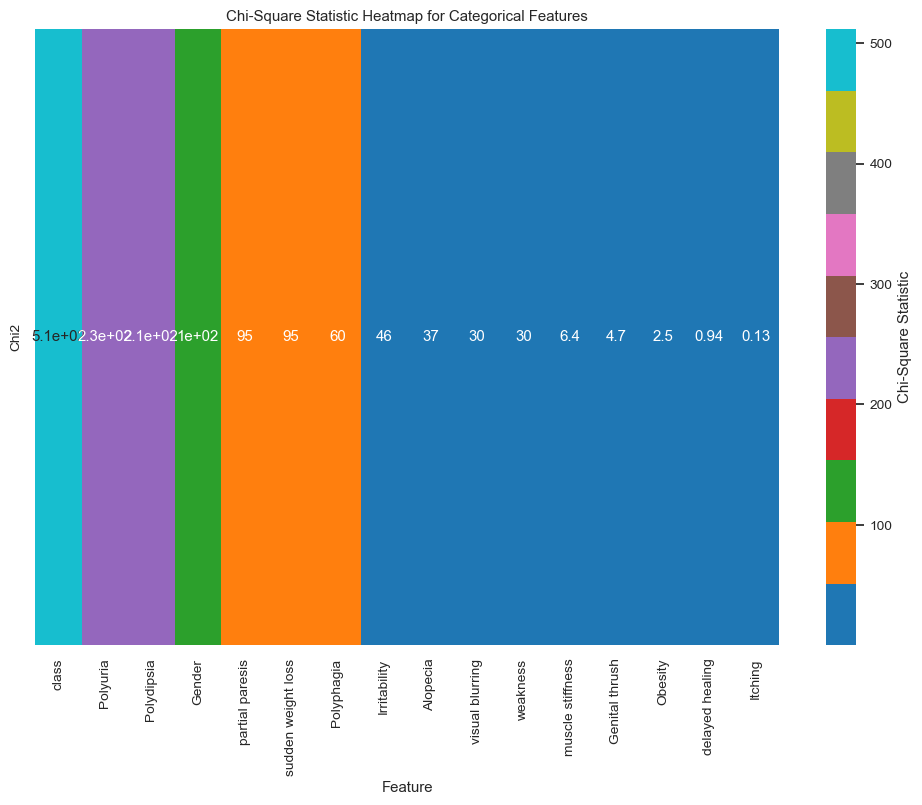

In [100]:
# plot the heatmap
heatmap_data = sorted_results_df.set_index('Feature')['Chi2'].to_frame().T

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='tab10', cbar_kws={'label': 'Chi-Square Statistic'})
plt.title('Chi-Square Statistic Heatmap for Categorical Features')
plt.show()

In [101]:
#Encoding 
#import necessary libraries for training and testing of the model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [102]:
encoder=OneHotEncoder(sparse=False,drop='first')# drop='first' to avoid dummy variable trap
#select categorical columns
categ_col=['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
encoded_features=encoder.fit_transform(diab_outliers[categ_col])
encoded_feature_names=encoder.get_feature_names_out(categ_col)
#create a dataframe for encoded df
encoded_df=pd.DataFrame(encoded_features,columns=encoded_feature_names)
df_final=pd.concat([diab_outliers.drop(columns=categ_col),encoded_df],axis=1)
print(df_final)


      Age     class  Gender_Male  Polyuria_Yes  Polydipsia_Yes  \
0    40.0  Positive          1.0           0.0             1.0   
1    58.0  Positive          1.0           0.0             0.0   
2    41.0  Positive          1.0           1.0             0.0   
3    45.0  Positive          1.0           0.0             0.0   
4    60.0  Positive          1.0           1.0             1.0   
..    ...       ...          ...           ...             ...   
519  42.0  Negative          NaN           NaN             NaN   
101   NaN       NaN          1.0           1.0             0.0   
102   NaN       NaN          1.0           1.0             0.0   
185   NaN       NaN          0.0           1.0             0.0   
186   NaN       NaN          1.0           0.0             1.0   

     sudden weight loss_Yes  weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  \
0                       0.0           1.0             0.0                 0.0   
1                       0.0           1.0    

In [103]:
df_final.isnull().sum()

Age                       4
class                     4
Gender_Male               4
Polyuria_Yes              4
Polydipsia_Yes            4
sudden weight loss_Yes    4
weakness_Yes              4
Polyphagia_Yes            4
Genital thrush_Yes        4
visual blurring_Yes       4
Itching_Yes               4
Irritability_Yes          4
delayed healing_Yes       4
partial paresis_Yes       4
muscle stiffness_Yes      4
Alopecia_Yes              4
Obesity_Yes               4
dtype: int64

In [104]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 186
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     516 non-null    float64
 1   class                   516 non-null    object 
 2   Gender_Male             516 non-null    float64
 3   Polyuria_Yes            516 non-null    float64
 4   Polydipsia_Yes          516 non-null    float64
 5   sudden weight loss_Yes  516 non-null    float64
 6   weakness_Yes            516 non-null    float64
 7   Polyphagia_Yes          516 non-null    float64
 8   Genital thrush_Yes      516 non-null    float64
 9   visual blurring_Yes     516 non-null    float64
 10  Itching_Yes             516 non-null    float64
 11  Irritability_Yes        516 non-null    float64
 12  delayed healing_Yes     516 non-null    float64
 13  partial paresis_Yes     516 non-null    float64
 14  muscle stiffness_Yes    516 non-null    float64

In [105]:
df_cleaned=df_final.dropna()

In [106]:
df_cleaned.isnull().sum()

Age                       0
class                     0
Gender_Male               0
Polyuria_Yes              0
Polydipsia_Yes            0
sudden weight loss_Yes    0
weakness_Yes              0
Polyphagia_Yes            0
Genital thrush_Yes        0
visual blurring_Yes       0
Itching_Yes               0
Irritability_Yes          0
delayed healing_Yes       0
partial paresis_Yes       0
muscle stiffness_Yes      0
Alopecia_Yes              0
Obesity_Yes               0
dtype: int64

In [107]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 0 to 515
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     512 non-null    float64
 1   class                   512 non-null    object 
 2   Gender_Male             512 non-null    float64
 3   Polyuria_Yes            512 non-null    float64
 4   Polydipsia_Yes          512 non-null    float64
 5   sudden weight loss_Yes  512 non-null    float64
 6   weakness_Yes            512 non-null    float64
 7   Polyphagia_Yes          512 non-null    float64
 8   Genital thrush_Yes      512 non-null    float64
 9   visual blurring_Yes     512 non-null    float64
 10  Itching_Yes             512 non-null    float64
 11  Irritability_Yes        512 non-null    float64
 12  delayed healing_Yes     512 non-null    float64
 13  partial paresis_Yes     512 non-null    float64
 14  muscle stiffness_Yes    512 non-null    float64

In [108]:
# Split the data
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('class', axis=1)
y = df_cleaned['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
# Assuming X_train was originally a DataFrame
feature_names = X_train.columns


In [110]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


# LOGISTIC REGRESSION

In [111]:
# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7378640776699029
Confusion Matrix:
 [[26 12]
 [15 50]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.63      0.68      0.66        38
    Positive       0.81      0.77      0.79        65

    accuracy                           0.74       103
   macro avg       0.72      0.73      0.72       103
weighted avg       0.74      0.74      0.74       103



# DECISION TREE CLASSIFIER

In [112]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
model_dt = DecisionTreeClassifier()

# Train the model
model_dt.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = model_dt.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt}")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)


Decision Tree Classifier:
Accuracy: 0.8155339805825242
Confusion Matrix:
 [[32  6]
 [13 52]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.71      0.84      0.77        38
    Positive       0.90      0.80      0.85        65

    accuracy                           0.82       103
   macro avg       0.80      0.82      0.81       103
weighted avg       0.83      0.82      0.82       103



# RANDOM FOREST CLASSIFIER

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model_rf = RandomForestClassifier()

# Train the model
model_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Random Forest Classifier:
Accuracy: 0.8446601941747572
Confusion Matrix:
 [[34  4]
 [12 53]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.89      0.81        38
    Positive       0.93      0.82      0.87        65

    accuracy                           0.84       103
   macro avg       0.83      0.86      0.84       103
weighted avg       0.86      0.84      0.85       103



# GRADIENTBOOST CLASSIFIER

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
model_gb = GradientBoostingClassifier()

# Train the model
model_gb.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = model_gb.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", class_report_gb)


Gradient Boosting Classifier:
Accuracy: 0.7961165048543689
Confusion Matrix:
 [[29  9]
 [12 53]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.71      0.76      0.73        38
    Positive       0.85      0.82      0.83        65

    accuracy                           0.80       103
   macro avg       0.78      0.79      0.78       103
weighted avg       0.80      0.80      0.80       103



# SUPPORT VECTOR MACHINE

In [115]:
from sklearn.svm import SVC

# Instantiate the model
model_svm = SVC()

# Train the model
model_svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = model_svm.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", class_report_svm)


Support Vector Machine (SVM):
Accuracy: 0.7766990291262136
Confusion Matrix:
 [[32  6]
 [17 48]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.65      0.84      0.74        38
    Positive       0.89      0.74      0.81        65

    accuracy                           0.78       103
   macro avg       0.77      0.79      0.77       103
weighted avg       0.80      0.78      0.78       103



# KNEAREST NEIGHBOURS

In [116]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
model_knn = KNeighborsClassifier()

# Train the model
model_knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)


K-Nearest Neighbors (KNN):
Accuracy: 0.7766990291262136
Confusion Matrix:
 [[29  9]
 [14 51]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.67      0.76      0.72        38
    Positive       0.85      0.78      0.82        65

    accuracy                           0.78       103
   macro avg       0.76      0.77      0.77       103
weighted avg       0.79      0.78      0.78       103



# Naive Bayes

In [117]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
model_nb = GaussianNB()

# Train the model
model_nb.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = model_nb.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", class_report_nb)


Naive Bayes Classifier:
Accuracy: 0.7572815533980582
Confusion Matrix:
 [[29  9]
 [16 49]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.64      0.76      0.70        38
    Positive       0.84      0.75      0.80        65

    accuracy                           0.76       103
   macro avg       0.74      0.76      0.75       103
weighted avg       0.77      0.76      0.76       103



# HYPER PARAMETER TUNING

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import joblib

# Define the parameter grid
param_grid = {
    'n_estimators': [20, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf = grid_search.best_estimator_


#save the model
joblib.dump(best_rf,'optimized_random_forest_model.pkl')

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy: 0.8543689320388349
Confusion Matrix:
 [[34  4]
 [11 54]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.89      0.82        38
    Positive       0.93      0.83      0.88        65

    accuracy                           0.85       103
   macro avg       0.84      0.86      0.85       103
weighted avg       0.87      0.85      0.86       103



# CROSS VALIDATION SCORE

In [119]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier with best parameters
best_rf = RandomForestClassifier(
    criterion='gini',
    max_depth=12,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std()}")


Cross-Validation Scores: [0.87804878 0.85365854 0.86585366 0.90243902 0.88888889]
Mean CV Accuracy: 0.8777777777777779
Standard Deviation of CV Accuracy: 0.017062413266880436


# FEATURE IMPORTANCE

                   Feature  Importance
0                      Age    0.245937
2             Polyuria_Yes    0.128297
3           Polydipsia_Yes    0.092293
8      visual blurring_Yes    0.060525
1              Gender_Male    0.053789
14            Alopecia_Yes    0.049410
13    muscle stiffness_Yes    0.046367
6           Polyphagia_Yes    0.044646
12     partial paresis_Yes    0.043570
9              Itching_Yes    0.042623
4   sudden weight loss_Yes    0.040194
11     delayed healing_Yes    0.039664
5             weakness_Yes    0.032407
7       Genital thrush_Yes    0.028038
15             Obesity_Yes    0.026645
10        Irritability_Yes    0.025594


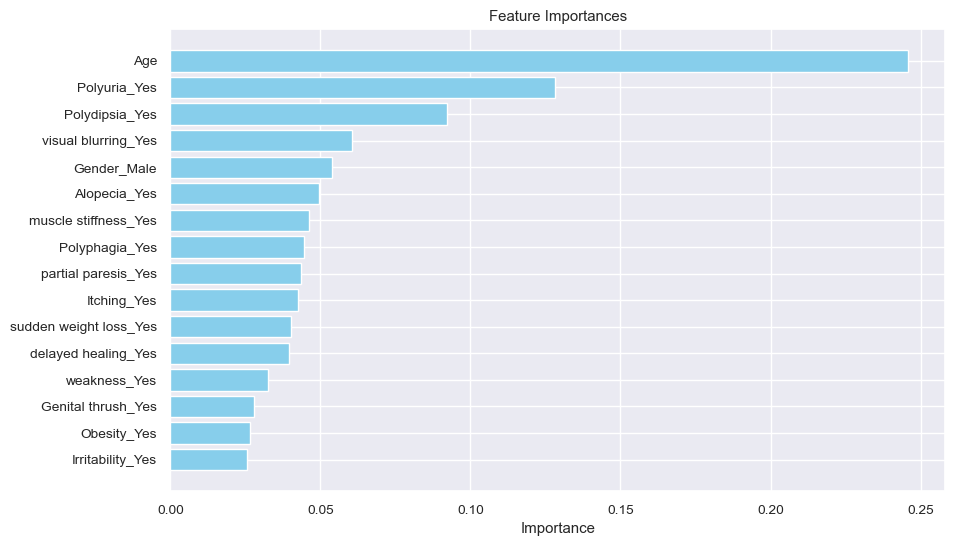

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the model
best_rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = best_rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


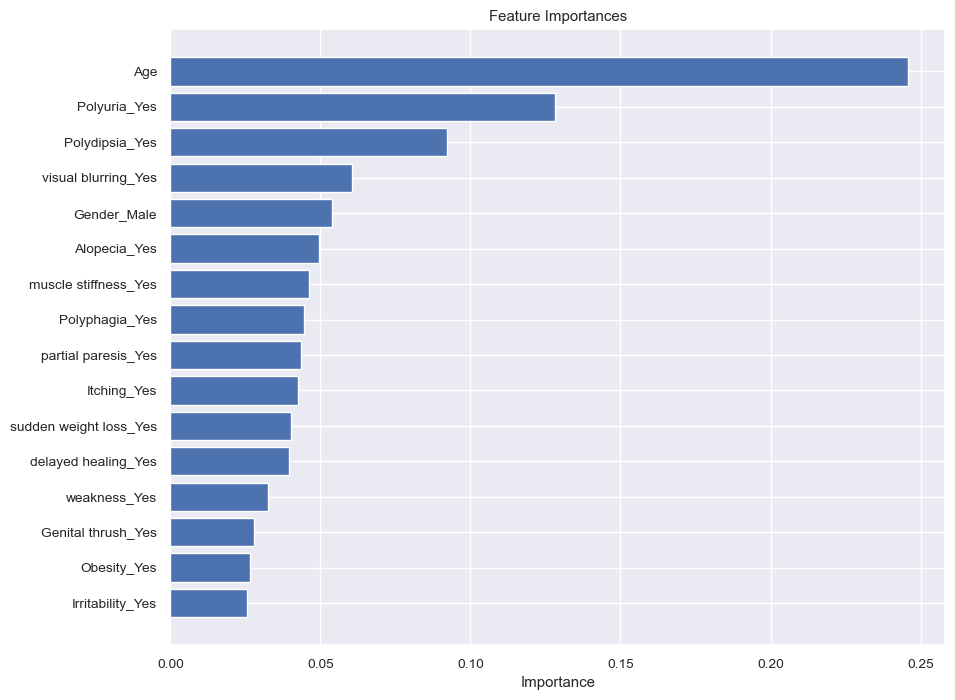

In [121]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


CONSIDERING ONLY IMPORTANT FEATURES AND PREDICTING THE MODEL TO INCREASE ACCURACY

In [122]:
# Define important features based on importance score
important_features = ['Age', 'Polyuria', 'Polydipsia', 'visual blurring', 'Gender','Alopecia','Polyphagia','partial paresis','muscle stiffness','sudden weight loss']
# Create a new dataset with only the important features
X_important = diab_outliers[important_features]

In [123]:
from sklearn.model_selection import train_test_split

# Split the data
X_train_important, X_test_important, y_train, y_test = train_test_split(X_important, diab_outliers['class'], test_size=0.2, random_state=42)


In [124]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in X_train_important.columns:
    if X_train_important[column].dtype == 'object':  # Check if the column is categorical
        X_train_important[column] = label_encoder.fit_transform(X_train_important[column])
        X_test_important[column] = label_encoder.transform(X_test_important[column])


In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_important_scaled = scaler.fit_transform(X_train_important)
X_test_important_scaled = scaler.transform(X_test_important)


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
model_important = RandomForestClassifier(n_estimators=200, max_depth=12, max_features='sqrt', criterion='gini', random_state=42)
model_important.fit(X_train_important_scaled, y_train)

# Make predictions
y_pred_important = model_important.predict(X_test_important_scaled)

# Evaluate the model
accuracy_important = accuracy_score(y_test, y_pred_important)
conf_matrix_important = confusion_matrix(y_test, y_pred_important)
class_report_important = classification_report(y_test, y_pred_important)

print(f"Accuracy with important features: {accuracy_important}")
print("Confusion Matrix with important features:\n", conf_matrix_important)
print("Classification Report with important features:\n", class_report_important)


Accuracy with important features: 0.9326923076923077
Confusion Matrix with important features:
 [[38  4]
 [ 3 59]]
Classification Report with important features:
               precision    recall  f1-score   support

    Negative       0.93      0.90      0.92        42
    Positive       0.94      0.95      0.94        62

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104



In [127]:
from sklearn.model_selection import cross_val_score

# Assuming you have already created X_train_important and y_train
cv_scores = cross_val_score(best_rf, X_train_important, y_train, cv=5, scoring='accuracy')

# Display mean and standard deviation of CV scores
print(f'Mean CV Accuracy: {cv_scores.mean()}')
print(f'Standard Deviation of CV Accuracy: {cv_scores.std()}')


Mean CV Accuracy: 0.9660593593887746
Standard Deviation of CV Accuracy: 0.02089041542658632


USING JOBLIB TO CREATE USER INTERFACE

In [128]:
import joblib

#save the best model
joblib.dump(best_rf,'optimized_random_forest_model.pkl')


['optimized_random_forest_model.pkl']

In [1]:
import sklearn
print(sklearn.__version__)

1.3.0
